In [1]:
import warnings
warnings.filterwarnings('ignore')

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [3]:
# read data
churn_df = pd.read_csv("C:\\Users\\Prashant\\Desktop\\telecom_churn_data.csv")

In [4]:
# look at initial rows of the data
churn_df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [5]:
# feature type summary
churn_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# look at data statistics

churn_df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [7]:
# create backup of data
original_df = churn_df.copy()

In [8]:
# create column name list by types of columns

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

categorical_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

numeric_cols = [column for column in churn_df.columns if column not in id_cols + date_cols + categorical_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Categorical cols:%d" % (len(id_cols), len(date_cols), len(numeric_cols), len(categorical_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(numeric_cols) + len(categorical_cols) == churn_df.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Categorical cols:8
True


# Handling missing values

In [9]:
# look at missing value ratio in each column
churn_df.isnull().sum()*100/churn_df.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

# Imputing missing values

## i) Imputing with zeroes

In [10]:

All_recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn_df[All_recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [11]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
churn_df.loc[churn_df.total_rech_data_6.isnull() & churn_df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


#### In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge that month.

In [12]:
# create a list of recharge columns where we will impute missing values with zeroes


impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [13]:
# impute missing values with 0s

churn_df[impute_zero] = churn_df[impute_zero].apply(lambda x: x.fillna(0))

In [14]:
# Checking if values are imputed correctly

print("Missing values:\n")
print(churn_df[impute_zero].isnull().sum()*100/churn_df.shape[1])

# summary

print("\n\nStatistics\n")
print(churn_df[impute_zero].describe(include='all'))

Missing values:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_amt_data_6  a

In [15]:
# drop id and date columns 

print("Shape before dropping: ", churn_df.shape)
churn_df = churn_df.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn_df.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


## ii) Replace NaN values in features(variables) having categorical values

#### We will replace missing values in the categorical values with a new category as '-1', later on we can replace all these categories of values -1, 0 ,1 with their correpsonding mean values.

In [16]:
# replace missing values with '-1' in categorical columns

churn_df[categorical_cols] = churn_df[categorical_cols].apply(lambda x: x.fillna(-1))

In [17]:
# missing value ratio
print("Missing value ratio:\n")
print(churn_df[categorical_cols].isnull().sum()*100/churn_df.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


## iii) Drop variables with more than a given threshold of missing values

In [18]:
cols = churn_df.shape[1]

THRESHOLD = 0.7

cols_included = list(churn_df.apply(lambda column: True if column.isnull().sum()/churn_df.shape[0] < THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churn_df.columns , 'include': cols_included})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [19]:
# drop columns

churn_df = churn_df.loc[:, cols_included]

dropped_cols = churn_df.shape[1] - cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


In [20]:
churn_df.shape

(99999, 196)

In [21]:
churn_df.isnull().sum()*100/churn_df.shape[0]

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

## iv) Imputing NaNs with Zero

In [22]:
col=['loc_ic_t2o_mou','loc_og_t2o_mou','roam_ic_mou_9', 'roam_ic_mou_8', 'roam_ic_mou_6','roam_ic_mou_7',
     'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9','loc_og_t2t_mou_6',
     'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9','loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 
     'loc_og_t2m_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
     'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9','std_og_t2m_mou_6',  'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9',
     'std_og_t2f_mou_6','std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
     'std_og_t2c_mou_9','onnet_mou_8', 'std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_og_mou_9',
      'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_9',
   'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'og_others_6', 'og_others_7', 'og_others_8','og_others_9',
     'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
      'loc_ic_t2f_mou_6','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',  'loc_ic_t2f_mou_7',  'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9',
      'std_ic_t2t_mou_6',  'std_ic_t2t_mou_7',  'std_ic_t2t_mou_8',  'std_ic_t2t_mou_9',  'std_ic_t2m_mou_6',  'std_ic_t2m_mou_7',  'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9',
     'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9',  'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9',
     'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_mou_9','total_ic_mou_6', 'total_ic_mou_7','total_ic_mou_8','total_ic_mou_9','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_ic_mou_9',
     'isd_ic_mou_6', 'isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9', 'ic_others_6', 'ic_others_7','ic_others_8','ic_others_9', 'std_og_t2o_mou',
    'loc_og_mou_6',  'loc_og_mou_7',  'loc_og_mou_8',  'loc_og_mou_9','std_og_t2t_mou_6' ,'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9','loc_og_t2f_mou_6']

In [23]:
churn_df[col].describe()

,loc_ic_t2o_mou,loc_og_t2o_mou,roam_ic_mou_9,roam_ic_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,onnet_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,std_og_t2o_mou,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2f_mou_6
count,98981.0,98981.0,92254.000000,94621.000000,96062.000000,96140.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,94621.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,94621.000000,92254.000000,96140.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,98981.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000
mean,0.0,0.0,6.343841,7.292981,9.950013,7.149898,13.911337,9.818732,9.971890,8.555519,132.395875,133.670805,133.018098,130.302327,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,1.123056,1.368500,1.433821,1.232726,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,0.0,0.0,0.0,0.0,133.018098,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,0.791247,0.723892,3.91

In [24]:


churn_df[col] = churn_df[col].apply(lambda x: x.fillna(0))

In [25]:
churn_df.isnull().sum()*100/churn_df.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [26]:
print(churn_df.isnull().values.any())

False


In [27]:
print(churn_df.isnull().values.sum())

0


# Filtering High-Value Customers (HVC)

### Calculating Total Data Recharge Amount

In [250]:
# calculate the total data recharge amount for June and July months as---- number of recharges * average recharge amount

churn_df['total_data_rech_6'] = churn_df.total_rech_data_6 * churn_df.av_rech_amt_data_6
churn_df['total_data_rech_7'] = churn_df.total_rech_data_7 * churn_df.av_rech_amt_data_7

### Adding total data recharge and total recharge to get total combined recharge amount for a month

In [251]:
# calculate total recharge amount for June and July months as---- recharge amount + data recharge amount

churn_df['amt_data_6'] = churn_df.total_rech_amt_6 + churn_df.total_data_rech_6
churn_df['amt_data_7'] = churn_df.total_rech_amt_7 + churn_df.total_data_rech_7

In [252]:
# calculate average recharge done by customer in June and July months


churn_df['av_amt_data_6_7'] = (churn_df.amt_data_6 + churn_df.amt_data_7)/2

In [253]:
# look at the 70th percentile recharge amount

print("Recharge amount at 70th percentile: {0}".format(churn_df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [254]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount

churn_final = churn_df.loc[churn_df.av_amt_data_6_7 >= churn_df.av_amt_data_6_7.quantile(0.7), :]
churn_final = churn_final.reset_index(drop=True)
churn_final.shape

(30001, 201)

In [255]:
# delete variables created to filter high-value customers


churn_final = churn_final.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_final.shape

(30001, 196)

We have 30,001 rows after selecting the HVC.

# Deriving Churn

In [256]:
# calculating total incoming and outgoing minutes of usage

churn_final['total_calls_mou_9'] = churn_final.total_ic_mou_9 + churn_final.total_og_mou_9

In [257]:
# calculating 2g and 3g data consumption

churn_final['total_internet_mb_9'] =  churn_final.vol_2g_mb_9 + churn_final.vol_3g_mb_9

In [258]:
# creating churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn

churn_final['churn'] = churn_final.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [259]:
# deleting derived variables

churn_final = churn_final.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [260]:
# changing data type to category

churn_final.churn = churn_final.churn.astype("category")

# print churn ratio

print(churn_final.churn.value_counts()*100/churn_final.shape[0])

0    91.863605
1     8.136395
Name: churn, dtype: float64


# Calculating the  difference between 8th and previous months

 Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [261]:
churn_final['arpu_diff'] = churn_final.arpu_8 - ((churn_final.arpu_6 + churn_final.arpu_7)/2)

churn_final['onnet_mou_diff'] = churn_final.onnet_mou_8 - ((churn_final.onnet_mou_6 + churn_final.onnet_mou_7)/2)

churn_final['offnet_mou_diff'] = churn_final.offnet_mou_8 - ((churn_final.offnet_mou_6 + churn_final.offnet_mou_7)/2)

churn_final['roam_ic_mou_diff'] = churn_final.roam_ic_mou_8 - ((churn_final.roam_ic_mou_6 + churn_final.roam_ic_mou_7)/2)

churn_final['roam_og_mou_diff'] = churn_final.roam_og_mou_8 - ((churn_final.roam_og_mou_6 + churn_final.roam_og_mou_7)/2)

churn_final['loc_og_mou_diff'] = churn_final.loc_og_mou_8 - ((churn_final.loc_og_mou_6 + churn_final.loc_og_mou_7)/2)

churn_final['std_og_mou_diff'] = churn_final.std_og_mou_8 - ((churn_final.std_og_mou_6 + churn_final.std_og_mou_7)/2)

churn_final['isd_og_mou_diff'] = churn_final.isd_og_mou_8 - ((churn_final.isd_og_mou_6 + churn_final.isd_og_mou_7)/2)

churn_final['spl_og_mou_diff'] = churn_final.spl_og_mou_8 - ((churn_final.spl_og_mou_6 + churn_final.spl_og_mou_7)/2)

churn_final['total_og_mou_diff'] = churn_final.total_og_mou_8 - ((churn_final.total_og_mou_6 + churn_final.total_og_mou_7)/2)

churn_final['loc_ic_mou_diff'] = churn_final.loc_ic_mou_8 - ((churn_final.loc_ic_mou_6 + churn_final.loc_ic_mou_7)/2)

churn_final['std_ic_mou_diff'] = churn_final.std_ic_mou_8 - ((churn_final.std_ic_mou_6 + churn_final.std_ic_mou_7)/2)

churn_final['isd_ic_mou_diff'] = churn_final.isd_ic_mou_8 - ((churn_final.isd_ic_mou_6 + churn_final.isd_ic_mou_7)/2)

churn_final['spl_ic_mou_diff'] = churn_final.spl_ic_mou_8 - ((churn_final.spl_ic_mou_6 + churn_final.spl_ic_mou_7)/2)

churn_final['total_ic_mou_diff'] = churn_final.total_ic_mou_8 - ((churn_final.total_ic_mou_6 + churn_final.total_ic_mou_7)/2)

churn_final['total_rech_num_diff'] = churn_final.total_rech_num_8 - ((churn_final.total_rech_num_6 + churn_final.total_rech_num_7)/2)

churn_final['total_rech_amt_diff'] = churn_final.total_rech_amt_8 - ((churn_final.total_rech_amt_6 + churn_final.total_rech_amt_7)/2)

churn_final['max_rech_amt_diff'] = churn_final.max_rech_amt_8 - ((churn_final.max_rech_amt_6 + churn_final.max_rech_amt_7)/2)

churn_final['total_rech_data_diff'] = churn_final.total_rech_data_8 - ((churn_final.total_rech_data_6 + churn_final.total_rech_data_7)/2)

churn_final['max_rech_data_diff'] = churn_final.max_rech_data_8 - ((churn_final.max_rech_data_6 + churn_final.max_rech_data_7)/2)

churn_final['av_rech_amt_data_diff'] = churn_final.av_rech_amt_data_8 - ((churn_final.av_rech_amt_data_6 + churn_final.av_rech_amt_data_7)/2)

churn_final['vol_2g_mb_diff'] = churn_final.vol_2g_mb_8 - ((churn_final.vol_2g_mb_6 + churn_final.vol_2g_mb_7)/2)

churn_final['vol_3g_mb_diff'] = churn_final.vol_3g_mb_8 - ((churn_final.vol_3g_mb_6 + churn_final.vol_3g_mb_7)/2)

## Deleting  columns that belong to the Churn (9th) Month

In [262]:
# delete all variables relating to 9th month

churn_final = churn_final.filter(regex='[^9]$', axis=1)
churn_final.shape

(30001, 173)

In [345]:
# extract all names that end with 9

col_9_names = churn_df.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list

categorical_cols = [col for col in categorical_cols if col not in col_9_names]

categorical_cols.append('churn')

numeric_cols = [col for col in churn_final.columns if col not in categorical_cols]

In [346]:
churn_final.shape

(30001, 173)

In [347]:
churn_final.describe([.25,.50, 0.75,0.90])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001

## Visualising Data

In [348]:
# change columns types

churn_final[numeric_cols] = churn_final[numeric_cols].apply(pd.to_numeric)
churn_final[categorical_cols] = churn_final[categorical_cols].apply(lambda column: column.astype("category"), axis=0)

<Figure size 1080x360 with 0 Axes>

Text(0.5,1,'arpu_6')

Text(0.5,1,'arpu_7')

Text(0.5,1,'arpu_8')

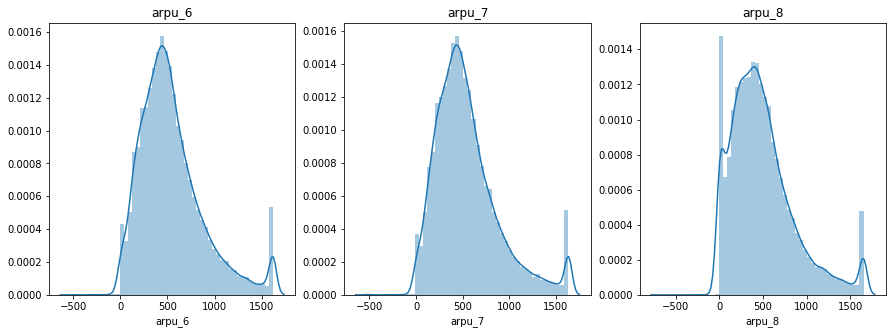

In [349]:
# subplots
plt.figure(figsize=[15,5])
# subplot 1
plt.subplot(1, 3, 1)
plt.title('arpu_6')
sns.distplot(churn_final["arpu_6"])

# subplot 2
plt.subplot(1, 3, 2)
plt.title("arpu_7")
sns.distplot(churn_final["arpu_7"])

# subplot 3
plt.subplot(1, 3, 3)
plt.title("arpu_8")
sns.distplot(churn_final["arpu_8"])


plt.show()

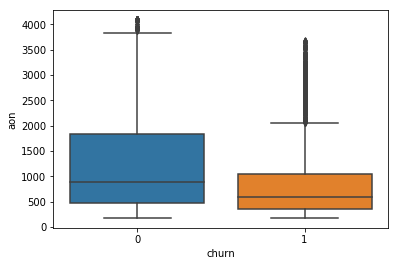

In [350]:
sns.boxplot(churn_final.churn, churn_final.aon)

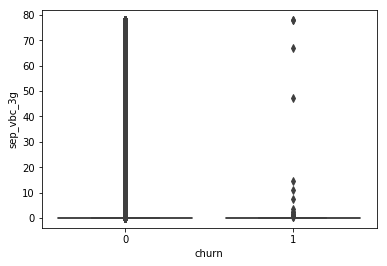

In [351]:
sns.boxplot(churn_final.churn, churn_final.sep_vbc_3g)

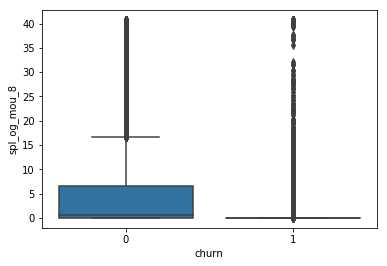

In [352]:
sns.boxplot(churn_final.churn, churn_final.spl_og_mou_8)

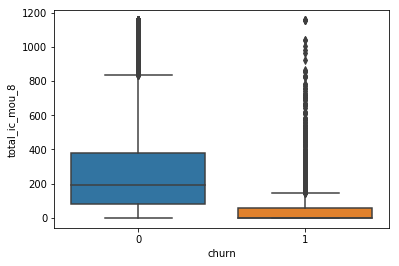

In [353]:
sns.boxplot(churn_final.churn, churn_final.total_ic_mou_8)

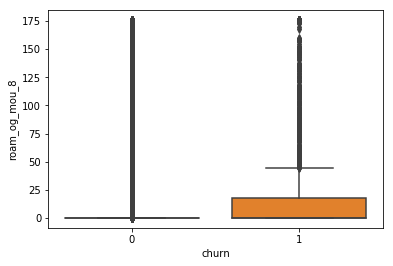

In [354]:
sns.boxplot(churn_final.churn, churn_final.roam_og_mou_8)

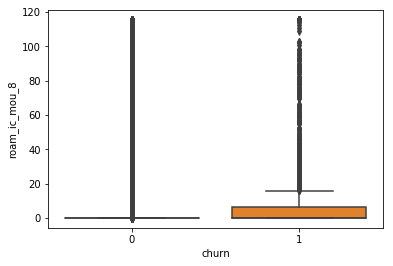

In [355]:
sns.boxplot(churn_final.churn, churn_final.roam_ic_mou_8)

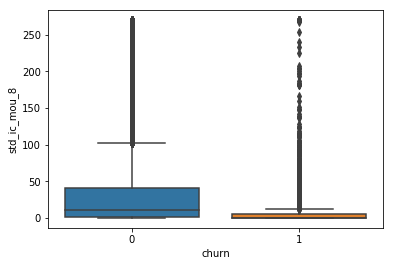

In [356]:
sns.boxplot(churn_final.churn, churn_final.std_ic_mou_8)

In [357]:
# create plotting functions

def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        


## Univariate EDA

count    30001.000000
mean       207.350329
std        321.240672
min          0.000000
25%         10.390000
50%         65.610000
75%        239.960000
max       1280.630507
Name: onnet_mou_8, dtype: float64


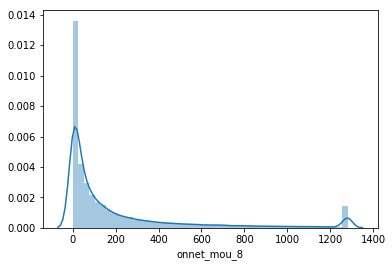

In [358]:
univariate(churn_final.onnet_mou_8)

count    30001.000000
mean       493.280452
std        366.354888
min       -655.038786
25%        231.473000
50%        427.585000
75%        661.491000
max       1651.921128
Name: arpu_8, dtype: float64


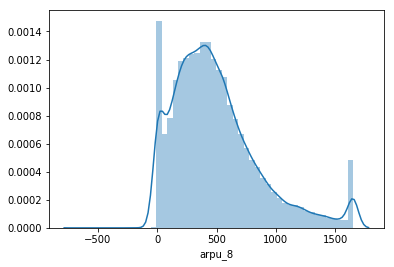

In [359]:
univariate(churn_final.arpu_8)

count    30001.000000
mean       312.404176
std        362.153776
min          0.000000
25%         46.740000
50%        182.790000
75%        438.890000
max       1479.241665
Name: offnet_mou_8, dtype: float64


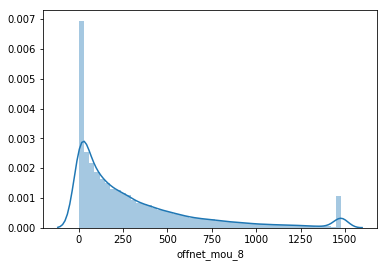

In [360]:
univariate(churn_final.offnet_mou_8)

## Bivariate EDA

#### Checking the count values of categorical variables

In [361]:
pd.crosstab(churn_final.churn, churn_final.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [362]:
pd.crosstab(churn_final.churn, churn_final.fb_user_8, normalize='columns')*100

fb_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,93.231707,97.568644
1,14.10877,6.768293,2.431356


In [363]:
pd.crosstab(churn_final.churn, churn_final.sachet_3g_8, normalize='columns')*100

sachet_3g_8,0.0,1.0,1.821857376045834
churn,,,
0,91.335357,97.103199,97.607178
1,8.664643,2.896801,2.392822


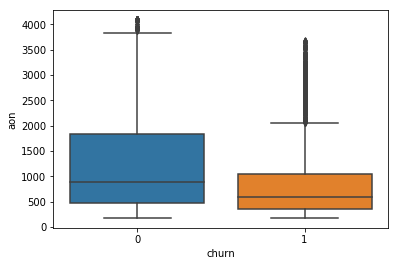

In [364]:
sns.boxplot(churn_final.churn, churn_final.aon)

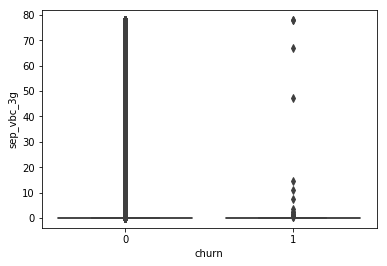

In [365]:
sns.boxplot(churn_final.churn, churn_final.sep_vbc_3g)

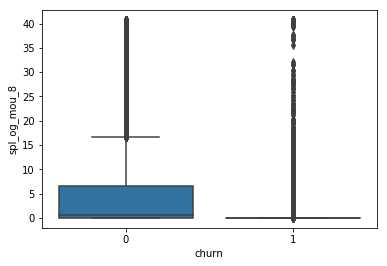

In [366]:
sns.boxplot(churn_final.churn, churn_final.spl_og_mou_8)

### Cap outliers in all numeric variables with 3-sigma method

In [367]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [368]:
# cap outliers in the numeric columns
churn_final[numeric_cols] = churn_final[numeric_cols].apply(cap_outliers, axis=0)

In [369]:

churn_final.shape

(30001, 173)

In [370]:
churn_final.describe([.25,.50,.75,.90])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001

# Model Building

## i) Making predictions

In [371]:
# import required libraries

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.metrics import sensitivity_specificity_support

## Preprocessing data

In [372]:
# change churn to numeric
churn_final['churn'] = pd.to_numeric(churn_final['churn'])

### Train Test split

In [373]:
# divide data into train and test
X = churn_final.drop("churn", axis = 1)
y = churn_final.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [374]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(22500, 172)

(22500,)

(7501, 172)

(7501,)

## Aggregating the categorical columns

In [375]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

night_pck_user_6
-1.0    0.099165
 0.0    0.066797
 1.0    0.087838
Name: churn, dtype: float64

night_pck_user_7
-1.0    0.115746
 0.0    0.055494
 1.0    0.051282
Name: churn, dtype: float64

night_pck_user_8
-1.0    0.141108
 0.0    0.029023
 1.0    0.016194
Name: churn, dtype: float64

fb_user_6
-1.0    0.099165
 0.0    0.069460
 1.0    0.067124
Name: churn, dtype: float64

fb_user_7
-1.0    0.115746
 0.0    0.059305
 1.0    0.055082
Name: churn, dtype: float64

fb_user_8
-1.0    0.141108
 0.0    0.066887
 1.0    0.024463
Name: churn, dtype: float64

In [376]:
# replace categories with aggregated values in each categorical column

mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [377]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 6 columns):
night_pck_user_6    22500 non-null float64
night_pck_user_7    22500 non-null float64
night_pck_user_8    22500 non-null float64
fb_user_6           22500 non-null float64
fb_user_7           22500 non-null float64
fb_user_8           22500 non-null float64
dtypes: float64(6)
memory usage: 1.2 MB


## Applying PCA

In [378]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [379]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [380]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       12.34
1       22.34
2       28.29
3       33.25
4       37.35
5       40.96
6       43.62
7       46.20
8       48.46
9       50.57
10      52.49
11      54.33
12      56.10
13      57.70
14      59.21
15      60.60
16      61.91
17      63.20
18      64.45
19      65.65
20      66.83
21      67.92
22      68.97
23      70.01
24      71.01
25      71.93
26      72.85
27      73.72
28      74.59
29      75.43
30      76.24
31      77.03
32      77.77
33      78.48
34      79.17
35      79.83
36      80.48
37      81.13
38      81.76
39      82.37
40      82.94
41      83.49
42      84.02
43      84.54
44      85.05
45      85.54
46      86.01
47      86.46
48      86.90
49      87.34
50      87.76
51      88.16
52      88.53
53      88.91
54      89.26
55      89.61
56      89.96
57      90.29
58      90.61
59      90.93
60      91.25
61      91.55
62      91.86
63      92.15
64      92.45
65      92.72
66      92.98
67      93.24
68      93.49
69      93.74
70      93.98
71    

~ 60 components explain 90% variance

~ 80 components explain 95% variance

<Figure size 630x360 with 0 Axes>

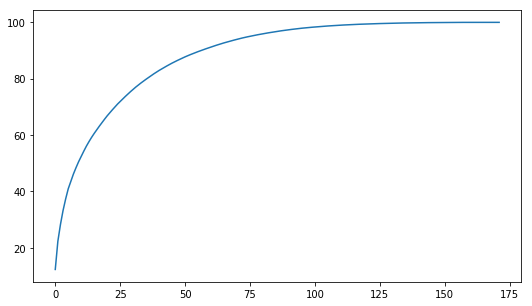

In [381]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## PCA and Logistic Regression

In [382]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [383]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

0.8207555555555556

### Evaluate on test data

In [385]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5597 1294]
 [  90  520]]
AUC:    	 0.91


#### AUC is 0.91 which is a good value.
#### Sensitivity =  TP/ (TP+FN) =  0.85
#### Specificity=  TN/(TN+FP)=  0.812

### Hyperparameter tuning - PCA and Logistic Regression

In [386]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

There is class Imbalance!!! Needs to be taken care!!!

### PCA

In [387]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
## As its evident that class 0: 90% and class1 : 10% (approx) thus we can balance that by 
##setting the class weights as 0.1 & 0.9 repectively. 

logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [388]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight={0: ...y='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [389]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.510179,0.728584,0.038498,0.009008,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.898353,0.904041,0.883470,0.887183,0.900087,0.894627,0.007902,32,0.899711,0.897632,0.901797,0.900605,0.897439,0.899437,0.001689
1,2.840171,0.209302,0.067022,0.022292,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.900904,0.907705,0.886475,0.891497,0.905045,0.898325,0.008085,16,0.904387,0.902586,0.907371,0.905564,0.902906,0.904563,0.001765
2,2.801473,0.218104,0.050665,0.008190,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.897239,0.904278,0.885052,0.887295,0.900030,0.894779,0.007409,31,0.901176,0.899026,0.903824,0.901769,0.899182,0.900995,0.001777
3,3.269827,0.123985,0.064299,0.014212,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.902209,0.907395,0.888176,0.894240,0.902201,0.898844,0.006793,11,0.907012,0.905420,0.909773,0.907643,0.905683,0.907106,0.001567
4,2.455555,0.051213,0.042686,0.005256,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.896998,0.904984,0.884781,0.888875,0.899594,0.895046,0.007303,30,0.901265,0.899707,0.903686,0.902308,0.899404,0.901274,0.001602
5,2.785927,0.094515,0.061839,0.009963,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.901895,0.907859,0.888193,0.894393,0.902682,0.899004,0.006906,4,0.907329,0.905474,0.909935,0.907977,0.905949,0.907333,0.001585
6,2.716648,0.190471,0.047666,0.001167,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.897774,0.904479,0.885545,0.889196,0.898811,0.895161,0.006856,28,0.902538,0.900163,0.904171,0.902599,0.899932,0.901881,0.001609
7,3.421342,0.207115,0.053461,0.011026,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.901798,0.907635,0.888638,0.895104,0.901838,0.899002,0.006527,5,0.907422,0.905394,0.910142,0.908206,0.906286,0.907490,0.001637
8,2.372722,0.090606,0.053112,0.012502,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.898200,0.905120,0.885839,0.889451,0.898895,0.895501,0.006947,21,0.902955,0.900200,0.903912,0.902796,0.899170,0.901807,0.001803
9,2.907479,0.184051,0.055378,0.008081,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.901814,0.907611,0.888791,0.894597,0.902226,0.899008,0.006574,3,0.907324,0.905719,0.910103,0.908109,0.906159,0.907483,0.001558


In [392]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8991990663279369
Best hyperparameters:  {'logistic__C': 4, 'logistic__penalty': 'l1', 'pca__n_components': 80}


In [393]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5844 1047]
 [  99  511]]
AUC:    	 0.91


Sensitivity= TP/(TP+FN) = 0.837

## Random Forest : For Best Features selection

#### ### In order to compensate class imbalance we are using class weights class 0: 0.1  & class 1: 0.9 

In [394]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function

### In order to compensate class imbalance we are using class weights class 0: 0.1  & class 1: 0.9 

forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [395]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   27.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [396]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8848131651333581
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [397]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6776  115]
 [ 321  289]]
AUC:    	 0.89


Here sensitivity = 0.47 which is very less. 

### Thus the best model is PCA along with Logistic regression.

### Random Forest is chosen to find best features in order to avoid churn rate.

## ii) Choosing best features from RF Model

In [398]:
# run a random forest model on train data

max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [399]:
# fit model

rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.1s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features=13,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=4,
            verbose=1, warm_start=False)

In [400]:
# OOB score

rf_model.oob_score_

0.9441333333333334

In [402]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6790  101]
 [ 327  283]]
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Sensitivity= TP/(TP+FN) = 0.463

## Feature Importance

In [404]:
# predictors
features = churn_final.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,loc_ic_mou_8,5.357858
1,total_ic_mou_8,5.178974
2,loc_ic_t2m_mou_8,5.051374
3,last_day_rch_amt_8,2.856285
4,total_og_mou_8,2.820893
5,loc_og_t2m_mou_8,2.764793
6,total_rech_amt_diff,2.657762
7,loc_og_mou_8,2.335596
8,arpu_8,2.303774
9,loc_og_t2t_mou_8,2.098021


### Extracting top 30 features

In [405]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

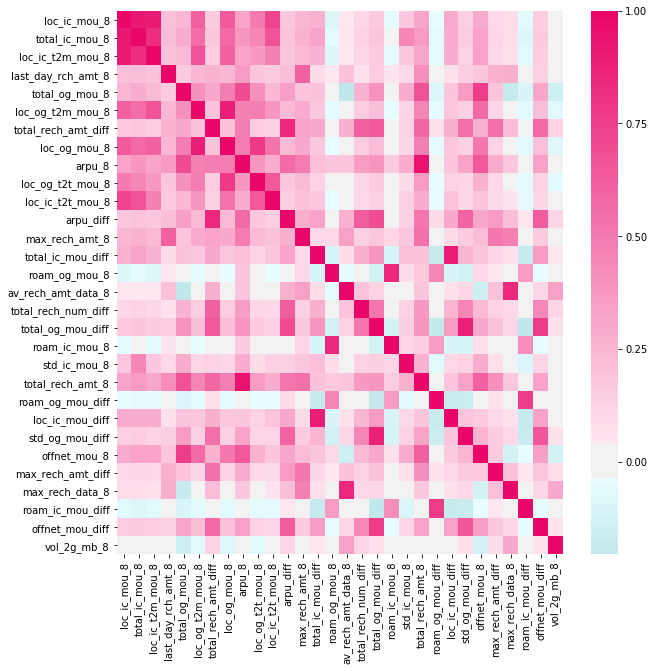

In [406]:
# plot feature correlation

import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

As its evident from correlation matrix that features :  Many features are highly correlated with each other thus we can choose few significant features out of these.


max_rech_data_8 and av_rech_amt_data_8  are highly correlated

std_og_mou_diff, std_og_mou_8  and total_og_mou_diff  are highly correlated

roam_ic_mou_diff, roam_ic_mou_8  and roam_og_mou_diff, roam_og_mou_8  are highly correlated

arpu_diff and total_rech_amt_diff   are highly correlated

loc_ic_mou_8 and total_ic_mou_8    are highly correlated



Selecting some of the features out of these set of variables

In [407]:
top_features = [ 'std_ic_mou_8', 'std_og_mou_8','total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'av_rech_amt_data_8','arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                ]
X_train = X_train[top_features]
X_test = X_test[top_features]

## Applying Logistic Regression Regularised Model on this selected set of features

In [408]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [409]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [410]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8747258570724457
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


Value of C is coming as high value because the selected features might be correlated. Which is still ok.

In [418]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
#sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
#print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5753 1138]
 [ 118  492]]
ROC:    	 0.88


### ROC is 0.88 which is a good value. 
### Sensitivity=  0.806

## Extract the intercept and the coefficients from the logistic model 

In [413]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [414]:
# intercept

intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [415]:
# coefficients

coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [416]:
# concatenate dataframes

coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,std_ic_mou_8,std_og_mou_8,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,av_rech_amt_data_8,arpu_8,roam_ic_mou_8,roam_og_mou_8
0,-1.471647,-0.02539,0.671291,-1.045275,-0.666506,-1.241029,-0.811047,0.206906,-0.004263,0.256787


## Inferences & Conclusions:

#### As its evident that  features like:     total_ic_mou_8 ,  total_rech_amt_diff ,  total_og_mou_8, roam_ic_mou_8  are negatively correlated with churn rate (target variable:logit), that means churn rate decreses if total_incoming_calls are more, and if total_recharge_amount_difference is more, and if total_outgoing_month_8 is more.

#### that is if activities at user end is more than chances of churn will be less.  & activity at user end will be more only when std, isd plan rates are reasonable as compare to other service providers. 

#### If a user is frequent traveller than his chances of churn can be more.

#### If a user calls std/ isd  very frequently than his chances of churn can be more.

Thus:
* The company needs to focus on the STD and ISD rates. If the rates are too high, provide them with better STD and ISD packages.

* The company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using roaming services. 

*The telecom company needs to work on customers services according to their requirements. 